use extracted features from image folder, and perform traditional ML models for the prediction

In [1]:
!pip3 install auto-sklearn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys

In [2]:
dfeatures  = pd.read_csv("../images/all_features.csv")
# dfeatures also includes target prediction columns

non_feature_cols = ["mos", "image", "dominant_color", "filename", "num_ratings", "ci", "std"] + [x for x in dfeatures.columns if "count_" in x]
d(dfeatures) 
print(non_feature_cols)
print(list(dfeatures.columns.difference(non_feature_cols)))


,image,nima_q,nima_a,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,...,saturation,si,simplicity,std,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency
0,pixabay_first50k/medium/still-life-art-and-lit...,5.201666,5.443225,26406.702098,0.327312,0.502772,138.659979,84.181416,2,1,...,45.451583,0.232381,2.163852e-05,1.162660,16945.347024,3.252017,0.759826,6,0.018195,0.133656
1,pixabay_first50k/medium/textures-3668419.jpg,5.092143,5.644749,67384.029520,0.268583,0.513747,104.675082,83.552939,4,7,...,43.201122,0.382488,9.852608e-07,1.298695,16790.058447,0.968191,0.577008,2,0.160672,0.367228
2,pixabay_first50k/medium/goose-3190750.jpg,5.255114,5.531336,48336.483041,0.417756,0.401333,52.028023,80.851269,2,2,...,11.047839,0.255594,9.999940e-01,1.074789,21863.079921,1.287890,0.788853,8,0.030221,0.171194
3,pixabay_first50k/medium/swan-fight-4066486.jpg,5.195546,5.461508,48337.186393,0.439059,0.405074,128.999337,88.055617,0,6,...,15.047624,0.314595,9.974234e-01,0.936734,19387.248858,1.091901,0.610565,2,0.039222,0.194122
4,pixabay_first50k/medium/el-capitan-4933472.jpg,4.831330,5.597155,58812.675989,0.223902,0.429635,153.932848,84.466508,0,3,...,35.516140,0.396389,2.065818e-05,1.040833,12562.584776,0.794549,0.702838,5,0.065129,0.246754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,koniq10k/medium/1289162225.jpg,4.859053,4.632835,137118.276066,0.299908,0.425412,141.939105,90.390416,6,7,...,7.646802,0.386891,9.142610e-01,1.199747,21645.689315,3.795820,0.641046,7,0.027771,0.164317
1022,koniq10k/medium/4551121129.jpg,5.217058,5.116648,142481.662501,0.277882,0.344962,137.463009,86.373567,1,4,...,39.050476,0.407439,9.633499e-01,0.797724,17954.100246,0.893128,0.762570,17,0.014751,0.120553
1023,koniq10k/medium/4605755313.jpg,4.330168,5.056751,423006.937656,0.238177,0.441372,153.328991,89.459027,0,4,...,9.260073,0.599511,2.755574e-08,1.069268,19269.845387,3.291512,0.499647,67,0.032618,0.177633
1024,koniq10k/medium/4034220859.jpg,5.058482,4.578805,1017.217432,0.461570,0.435794,61.733606,94.065372,8,6,...,88.385312,0.073388,9.997045e-01,1.167077,19121.098945,1.339804,0.432870,2,0.009183,0.095386


['mos', 'image', 'dominant_color', 'filename', 'num_ratings', 'ci', 'std', 'count_1', 'count_2', 'count_3', 'count_4', 'count_5']
['blur', 'blur_stength', 'color_fulness', 'contrast', 'cpbd', 'deepgaze_connected_components', 'deepgaze_mean_saliency', 'deepgaze_std_saliency', 'fft', 'mean_depth', 'mean_dominant_color', 'mean_segmentation', 'neg', 'neu', 'nima_a', 'nima_q', 'niqe', 'noise', 'number_segmentation', 'pos', 'rule_of_thirds', 'saturation', 'si', 'simplicity', 'std_depth', 'std_segmentation', 'tone', 'unisalconnected_components', 'unisalmean_saliency', 'unisalstd_saliency']


In [26]:
# create some ML models
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt

In [5]:
X = dfeatures[dfeatures.columns.difference(non_feature_cols)].values
y = dfeatures["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [9]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='./autosklearn_regression_example_tmp__',
    memory_limit=None
)
automl.fit(X_train, y_train, dataset_name='image_appeal')


[ERROR] [2023-01-23 18:04:46,964:Client-AutoML(1):image_appeal] '>' not supported between instances of 'NoneType' and 'int'
Traceback (most recent call last):
  File "/home/sgoering/.local/lib/python3.9/site-packages/autosklearn/automl.py", line 680, in fit
    X, y = reduce_dataset_size_if_too_large(
  File "/home/sgoering/.local/lib/python3.9/site-packages/autosklearn/util/data.py", line 430, in reduce_dataset_size_if_too_large
    assert memory_limit > 0
TypeError: '>' not supported between instances of 'NoneType' and 'int'


TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [ ]:
print(automl.leaderboard())

In [ ]:
pprint(automl.show_models(), indent=4)

In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

metrics = []

dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(y="pred", x="truth", data=dres, color="black")
ax.set_ylabel("prediction")
ax.set_xlabel("mos")

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "-feature": "none"
}
)
title = f"auto-sklearn: P:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn.pdf", bbox_inches="tight")

In [ ]:
# check individual features

for feature_col in dfeatures.columns.difference(non_feature_cols):
    
    X = dfeatures[dfeatures.columns.difference(non_feature_cols + [feature_col])].values
    y = dfeatures["mos"].values

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

    automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='./autosklearn_regression_example_tmp',
    )
    automl.fit(X_train, y_train, dataset_name='image_appeal')
    train_predictions = automl.predict(X_train)

    print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
    test_predictions = automl.predict(X_test)
    print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

    dres = pd.DataFrame({
        "pred": test_predictions,
        "truth": y_test
    })
    import seaborn as sns
    sns.set(rc={'figure.figsize':(6,6)})
    sns.set_style("white")

    ax = sns.scatterplot(x="pred", y="truth", data=dres)

    col = "pred"
    p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
    k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
    s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
    metrics.append({
        "p": p,
        "k": k,
        "s": s,
        "-feature": feature_col
    })
    title = f"P:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; FS-{feature_col}"
    ax.set_title(title)
    plt.show()

In [ ]:
dm = pd.DataFrame(metrics).sort_values(by="p")
d(dm)

In [ ]:
ax = sns.barplot(x="p", y="-feature", data=dm)
ax.set_title("feature set evaluation")
ax.set_xlabel("pearson")
ax.get_figure().savefig("feature_set_eval.pdf", bbox_inches="tight")
    

In [ ]:
# load other SoA Features

df = pd.read_csv("../evaluation_other_soa_features/features_flattened_with_mos.csv.bz2")
d(df.head())

In [ ]:
non_feature_columns = ["filename", "mos", "std", "ci", "num_ratings", "file"] + [f"count_{i}" for i in range(1,6)]

In [ ]:
feature_columns = df.columns.difference(non_feature_columns)

#feature_columns = [x for x in feature_columns if "Khosla14-texture_" not in x]
print(feature_columns)

In [ ]:
X = df[feature_columns].values
y = df["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='./autosklearn_regression_example_tmp_2',
)
automl.fit(X_train, y_train, dataset_name='image_appeal_soa_features')

In [ ]:
print(automl.leaderboard())
pprint(automl.show_models(), indent=4)
# this cell may return an error, the features are not "good" enough for several models

In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

metrics = []

dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "-feature": "none"
}
)
title = f"other SoA features\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; FS"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_other_soa.pdf", bbox_inches="tight")

In [ ]:
# load popularity features

dpopu = pd.read_json("../evaluation_image_popularity_insta/Intrinsic-Image-Popularity/popularity.json")
dpopu["image"] = dpopu["image"].apply(lambda x: x.replace("../../images/", ""))
d(dpopu.head())

In [ ]:
dm = pd.merge(dfeatures, dpopu, left_on="image", right_on="image")
non_feature_cols = ["mos", "image", "dominant_color", "filename", "num_ratings", "ci", "std"] + [x for x in dm.columns if "count_" in x]
feature_columns = list(dm.columns.difference(non_feature_cols))
d(dm)

In [ ]:
X = dm[feature_columns].values
y = dm["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='./autosklearn_regression_example_tmp_3',
)
automl.fit(X_train, y_train, dataset_name='image_appeal_popularity')

In [ ]:
print(automl.leaderboard())
pprint(automl.show_models(), indent=4)

In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

metrics = []

dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "-feature": "none"
}
)
title = f"features + popularity\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; FS+ popularity"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_features_popularity.pdf", bbox_inches="tight")

In [ ]:
# continue here:

In [3]:

# check dnn features (VGG19)
def flatten_features(x):
    res = {
        "img_path": x["img_path"],
    }
    for i in range(len(x["features"])):
        res[f"f[{i}]"] = x["features"][i]
    return pd.Series(res)

ddn = pd.read_json("../dnn_features/dnn_features.json.bz2").apply(flatten_features, axis=1)

d(ddn)

,img_path,f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],...,f[25078],f[25079],f[25080],f[25081],f[25082],f[25083],f[25084],f[25085],f[25086],f[25087]
0,../images/500px_cc0/medium/78827175_Mug_of_Coc...,9.619519,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.771137,0.0,0.000000,0.000000,0.00000,0.0,11.083537,0.000000
1,../images/500px_cc0/medium/162876571_among_the...,5.209553,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,8.71033,0.0,0.000000,0.000000
2,../images/500px_cc0/medium/194901225_Frozen_Ba...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,7.827873,0.000000
3,../images/500px_cc0/medium/162077443_Sunset.jpg,0.000000,0.0,0.0,0.0,2.071812,0.0,0.0,0.000000,0.0,...,16.636917,0.0,0.000000,0.0,0.000000,29.996817,0.00000,0.0,14.026822,2.653978
4,../images/500px_cc0/medium/139228225_Sunset-Pi...,11.059397,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.349994,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,1.491874,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,../images/pixabay_first50k/medium/nature-96329...,0.000000,0.0,0.0,0.0,0.086890,0.0,0.0,0.000000,0.0,...,0.000000,0.0,11.754500,0.0,4.971154,0.000000,0.00000,0.0,0.000000,0.000000
1057,../images/pixabay_first50k/medium/potion-12490...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,65.720573,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
1058,../images/pixabay_first50k/medium/wine-1796891...,0.000000,0.0,0.0,0.0,7.333746,0.0,0.0,0.000000,0.0,...,0.673458,0.0,0.000000,0.0,12.211042,0.000000,0.00000,0.0,0.000000,0.000000
1059,../images/pixabay_first50k/medium/waterscape-4...,11.432262,0.0,0.0,0.0,66.294662,0.0,0.0,0.000000,0.0,...,10.878078,0.0,7.799907,0.0,0.000000,0.000000,0.00000,0.0,2.435435,0.000000


In [5]:
if not os.path.isfile("dnn_features.csv.gz"):
    ddn.to_csv("dnn_features.csv.gz", index=False)

In [4]:
ddn["img_path"] = ddn["img_path"].apply(lambda x: x.replace("../images/", ""))

In [5]:
ddn_mos = pd.merge(dfeatures[["filename", "mos"]], ddn, left_on="filename", right_on="img_path")
d(ddn_mos)

,filename,mos,img_path,f[0],f[1],f[2],f[3],f[4],f[5],f[6],...,f[25078],f[25079],f[25080],f[25081],f[25082],f[25083],f[25084],f[25085],f[25086],f[25087]
0,pixabay_first50k/medium/still-life-art-and-lit...,3.521739,pixabay_first50k/medium/still-life-art-and-lit...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,16.141516,0.0
1,pixabay_first50k/medium/textures-3668419.jpg,2.925926,pixabay_first50k/medium/textures-3668419.jpg,0.973819,0.0,9.526690,0.0,0.000000,0.938878,0.000000,...,0.000000,0.0,0.000000,20.479837,20.427782,0.0,2.670449,0.0,0.000000,0.0
2,pixabay_first50k/medium/goose-3190750.jpg,3.500000,pixabay_first50k/medium/goose-3190750.jpg,0.000000,0.0,1.965977,0.0,9.666653,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,pixabay_first50k/medium/swan-fight-4066486.jpg,3.173913,pixabay_first50k/medium/swan-fight-4066486.jpg,0.000000,0.0,0.000000,0.0,5.243044,0.000000,0.000000,...,0.000000,0.0,15.837810,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,pixabay_first50k/medium/el-capitan-4933472.jpg,4.000000,pixabay_first50k/medium/el-capitan-4933472.jpg,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,1.512938,0.0,13.084454,0.000000,0.000000,0.0,0.000000,0.0,0.681643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,koniq10k/medium/1289162225.jpg,2.757576,koniq10k/medium/1289162225.jpg,0.000000,0.0,0.000000,0.0,15.985314,0.000000,0.451038,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,27.861467,0.0,0.000000,0.0
1022,koniq10k/medium/4551121129.jpg,3.000000,koniq10k/medium/4551121129.jpg,0.000000,0.0,0.000000,0.0,2.457002,0.000000,0.000000,...,0.000000,0.0,11.642262,0.000000,0.000000,0.0,0.000000,0.0,6.376184,0.0
1023,koniq10k/medium/4605755313.jpg,3.680000,koniq10k/medium/4605755313.jpg,10.826817,0.0,0.000000,0.0,24.234997,0.000000,0.000000,...,8.850662,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,13.159838,0.0
1024,koniq10k/medium/4034220859.jpg,2.500000,koniq10k/medium/4034220859.jpg,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,20.196932,0.0,0.000000,0.000000,0.000000,0.0,8.839711,0.0,0.943072,0.0


In [8]:
feature_columns = list(ddn_mos.columns.difference(["filename", "mos", "img_path"]))
X = ddn_mos[feature_columns].values
y = ddn_mos["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42
)
rf.fit(X_train, y_train)



RandomForestRegressor(n_jobs=-1, random_state=42)

Train R2 score: 0.905392561805385
Test R2 score: 0.39067703625339834


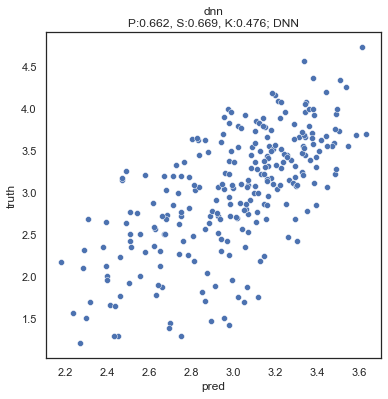

In [10]:
train_predictions = rf.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = rf.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

metrics = []

dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "model": "dnnf"
}
)
title = f"dnn\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; DNN"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_features_dnn_features.pdf", bbox_inches="tight")

In [87]:
df_t = dfeatures[dfeatures.columns.difference(["mos", "image", "dominant_color", "num_ratings", "ci", "std"] + [x for x in dfeatures.columns if "count_" in x]
)].copy()

ddnnf = pd.merge(df_t, ddn_mos, left_on="filename", right_on="filename")
d(ddnnf)

,blur,blur_stength,color_fulness,contrast,cpbd,deepgaze_connected_components,deepgaze_mean_saliency,deepgaze_std_saliency,fft,filename,...,f[25078],f[25079],f[25080],f[25081],f[25082],f[25083],f[25084],f[25085],f[25086],f[25087]
0,26406.702098,0.327312,138.659979,84.181416,0.884722,5,0.010058,0.099783,56388.300286,pixabay_first50k/medium/still-life-art-and-lit...,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,16.141516,0.0
1,67384.029520,0.268583,104.675082,83.552939,0.975000,3,0.062238,0.241588,57614.486990,pixabay_first50k/medium/textures-3668419.jpg,...,0.000000,0.0,0.000000,20.479837,20.427782,0.0,2.670449,0.0,0.000000,0.0
2,48336.483041,0.417756,52.028023,80.851269,0.836491,3,0.035686,0.185507,59962.971557,pixabay_first50k/medium/goose-3190750.jpg,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,48337.186393,0.439059,128.999337,88.055617,0.619565,3,0.009174,0.095339,54360.709147,pixabay_first50k/medium/swan-fight-4066486.jpg,...,0.000000,0.0,15.837810,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,58812.675989,0.223902,153.932848,84.466508,0.988669,3,0.066589,0.249309,61641.960527,pixabay_first50k/medium/el-capitan-4933472.jpg,...,1.512938,0.0,13.084454,0.000000,0.000000,0.0,0.000000,0.0,0.681643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,137118.276066,0.299908,141.939105,90.390416,0.966261,3,0.003165,0.056172,45568.611674,koniq10k/medium/1289162225.jpg,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,27.861467,0.0,0.000000,0.0
1034,142481.662501,0.277882,137.463009,86.373567,0.986333,4,0.015564,0.123781,66912.650553,koniq10k/medium/4551121129.jpg,...,0.000000,0.0,11.642262,0.000000,0.000000,0.0,0.000000,0.0,6.376184,0.0
1035,423006.937656,0.238177,153.328991,89.459027,0.994017,4,0.007982,0.088985,73605.414121,koniq10k/medium/4605755313.jpg,...,8.850662,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,13.159838,0.0
1036,1017.217432,0.461570,61.733606,94.065372,0.125000,2,0.002701,0.051897,30615.182097,koniq10k/medium/4034220859.jpg,...,20.196932,0.0,0.000000,0.000000,0.000000,0.0,8.839711,0.0,0.943072,0.0


In [40]:
feature_columns = list(df_t.columns.difference(["filename", "mos", "img_path"]))
X = dfeatures[feature_columns].values
y = dfeatures["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)



In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

Train R2 score: 0.9260004803271447
Test R2 score: 0.44776270864716605


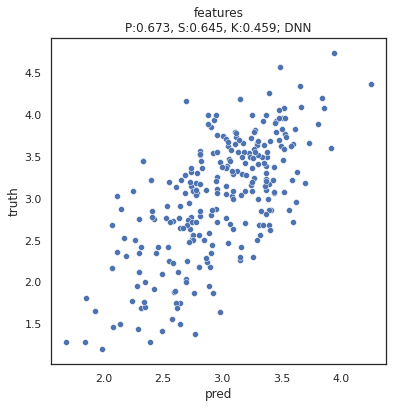

In [43]:
train_predictions = rf.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = rf.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))


dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "model": "features"
}
)
title = f"features\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; DNN"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_features__features.pdf", bbox_inches="tight")


In [33]:


feature_columns = list(ddnnf.columns.difference(["filename", "mos", "img_path"]))
X = ddnnf[feature_columns].values
y = ddnnf["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)



In [89]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

Train R2 score: 0.9279629435101884
Test R2 score: 0.5303644951134748


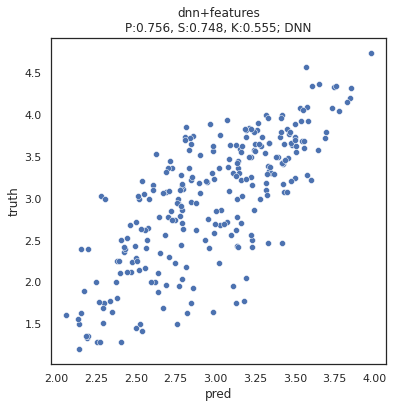

In [35]:
train_predictions = rf.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = rf.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))


dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "model": "dnnf+features"
}
)
title = f"dnn+features\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; DNN"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_features_dnn_features_plus_features.pdf", bbox_inches="tight")


In [90]:
# leave one out of the signal features

def evaluate(feature_col):
    feature_columns = list(ddnnf.columns.difference(["filename", "mos", "img_path", feature_col]))
    X = ddnnf[feature_columns].values
    y = ddnnf["mos"].values

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

    rf = RandomForestRegressor(
        n_estimators=100,  # <-- was 10 before, 10 maybe better?
        n_jobs=-1, 
        random_state=42
    )
    rf.fit(X_train, y_train)

    test_predictions = rf.predict(X_test)

    dres = pd.DataFrame({
        "pred": test_predictions,
        "truth": y_test
    })

    col = "pred"
    p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
    k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
    s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
    return{
        "p": p,
        "k": k,
        "s": s,
        "model": f"dnnf+features - {feature_col}"
    }
    
    

leave_one_out = []

for col in ddnnf.columns.difference(["filename", "mos", "img_path"]):
    if "f[" in col:
        continue
    print(col)
    res = evaluate(col)
    #break
    leave_one_out.append(res)

blur
blur_stength
color_fulness
contrast
cpbd
deepgaze_connected_components
deepgaze_mean_saliency
deepgaze_std_saliency
fft
mean_depth
mean_dominant_color
mean_segmentation
neg
neu
nima_a
nima_q
niqe
noise
number_segmentation
pos
rule_of_thirds
saturation
si
simplicity
std_depth
std_segmentation
tone
unisalconnected_components
unisalmean_saliency
unisalstd_saliency


,p,k,s,model
14,0.749744,0.554685,0.746288,- nima_a
8,0.753622,0.555161,0.747653,- fft
13,0.753672,0.554329,0.745726,-sentiment_neu
5,0.754029,0.553496,0.746741,- deepgaze_connected_components
0,0.754063,0.555756,0.748056,- blur
7,0.754073,0.555577,0.747379,- deepgaze_std_saliency
6,0.754079,0.555577,0.747379,- deepgaze_mean_saliency
11,0.754089,0.553912,0.746157,- mean_segmentation
15,0.754790,0.555221,0.748906,- nima_q
12,0.755146,0.555696,0.748406,-sentiment_neg


\begin{tabular}{lrrr}
\toprule
                          model &     p &     k &     s \\
\midrule
                       - nima\_a & 0.750 & 0.555 & 0.746 \\
                          - fft & 0.754 & 0.555 & 0.748 \\
                 -sentiment\_neu & 0.754 & 0.554 & 0.746 \\
- deepgaze\_connected\_components & 0.754 & 0.553 & 0.747 \\
                         - blur & 0.754 & 0.556 & 0.748 \\
        - deepgaze\_std\_saliency & 0.754 & 0.556 & 0.747 \\
       - deepgaze\_mean\_saliency & 0.754 & 0.556 & 0.747 \\
            - mean\_segmentation & 0.754 & 0.554 & 0.746 \\
                       - nima\_q & 0.755 & 0.555 & 0.749 \\
                 -sentiment\_neg & 0.755 & 0.556 & 0.748 \\
                     - contrast & 0.755 & 0.557 & 0.748 \\
          - mean\_dominant\_color & 0.755 & 0.555 & 0.747 \\
   - unisalconnected\_components & 0.755 & 0.555 & 0.748 \\
                 -sentiment\_pos & 0.755 & 0.555 & 0.748 \\
                         - cpbd & 0.755 & 0.555 & 0.747 \\
 

/tmp/ipykernel_532583/1346685843.py:25: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dleave[["model", "p", "k", "s"]].round(3).to_latex(index=False))


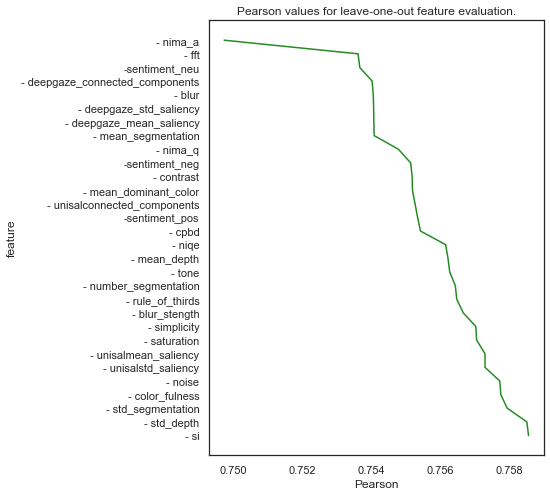

In [91]:
dleave = pd.DataFrame(leave_one_out).sort_values(by="p", ascending=True)

dleave["model"] = dleave["model"].apply(lambda x: x.replace("dnnf+features ", ""))
dleave["model"] = dleave["model"].apply(
    lambda x: "-sentiment_" + x.replace("- ", "") if x in ["- neg", "- neu", "- pos"] else x
)



d(dleave)

sns.set(rc={'figure.figsize':(6,8)})
sns.set_style("white")

ax = sns.lineplot(x="p", y="model", data=dleave, color="forestgreen")
ax.set_title("Pearson values for leave-one-out feature evaluation.")
ax.set_xlabel("Pearson")
ax.set_ylabel("feature")

ax.get_figure().savefig(
    "leave_one_out.pdf", 
    bbox_inches="tight"
)

print(dleave[["model", "p", "k", "s"]].round(3).to_latex(index=False))

In [45]:
ddnnmetrics = pd.DataFrame(metrics).sort_values(by="p", ascending=False)[["model", "p", "k", "s"]]
d(ddnnmetrics)
print(ddnnmetrics.round(3).to_latex(index=False))

,model,p,k,s
1,dnnf+features,0.755743,0.555280,0.747662
2,features,0.673456,0.459128,0.644731
0,dnnf,0.658202,0.473733,0.665585


\begin{tabular}{lrrr}
\toprule
        model &     p &     k &     s \\
\midrule
dnnf+features & 0.756 & 0.555 & 0.748 \\
     features & 0.673 & 0.459 & 0.645 \\
         dnnf & 0.658 & 0.474 & 0.666 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2096052/280308507.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ddnnmetrics.round(3).to_latex(index=False))


# classification

the following part targets the appeal prediction problem as classification, and uses dnnf+features for model training

In [92]:
# define classes

count_cols = [x for x in dfeatures.columns if "count_" in x]

df_tmp = dfeatures[dfeatures.columns.difference(["mos", "image", "dominant_color", "num_ratings", "ci", "std"] 
)].copy()

ddnnf_class = pd.merge(df_tmp, ddn_mos, left_on="filename", right_on="filename")

ddnnf_class = ddnnf_class[ddnnf_class.columns.difference(["mos"])]


def get_class(x):
    arg_max = x.argmax()
    if arg_max <= 1:
        return 0
    if arg_max <= 2:
        return 1
    return 2

ddnnf_class["class"] = ddnnf_class[count_cols].apply(get_class, axis=1)

d(ddnnf_class)



,blur,blur_stength,color_fulness,contrast,count_1,count_2,count_3,count_4,count_5,cpbd,...,saturation,si,simplicity,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency,class
0,26406.702098,0.327312,138.659979,84.181416,2,1,8,7,5,0.884722,...,45.451583,0.232381,2.163852e-05,16945.347024,3.252017,0.759826,6,0.018195,0.133656,1
1,67384.029520,0.268583,104.675082,83.552939,4,7,7,5,4,0.975000,...,43.201122,0.382488,9.852608e-07,16790.058447,0.968191,0.577008,2,0.160672,0.367228,0
2,48336.483041,0.417756,52.028023,80.851269,2,2,10,11,5,0.836491,...,11.047839,0.255594,9.999940e-01,21863.079921,1.287890,0.788853,8,0.030221,0.171194,2
3,48337.186393,0.439059,128.999337,88.055617,0,6,9,6,2,0.619565,...,15.047624,0.314595,9.974234e-01,19387.248858,1.091901,0.610565,2,0.039222,0.194122,1
4,58812.675989,0.223902,153.932848,84.466508,0,3,4,8,10,0.988669,...,35.516140,0.396389,2.065818e-05,12562.584776,0.794549,0.702838,5,0.065129,0.246754,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,137118.276066,0.299908,141.939105,90.390416,6,7,12,5,3,0.966261,...,7.646802,0.386891,9.142610e-01,21645.689315,3.795820,0.641046,7,0.027771,0.164317,1
1034,142481.662501,0.277882,137.463009,86.373567,1,4,12,6,0,0.986333,...,39.050476,0.407439,9.633499e-01,17954.100246,0.893128,0.762570,17,0.014751,0.120553,1
1035,423006.937656,0.238177,153.328991,89.459027,0,4,7,7,7,0.994017,...,9.260073,0.599511,2.755574e-08,19269.845387,3.291512,0.499647,67,0.032618,0.177633,1
1036,1017.217432,0.461570,61.733606,94.065372,8,6,10,5,1,0.125000,...,88.385312,0.073388,9.997045e-01,19121.098945,1.339804,0.432870,2,0.009183,0.095386,1


In [128]:
# classification

feature_columns = list(ddnnf_class.columns.difference(["filename", "mos", "img_path", "class"] + count_cols))

X = ddnnf_class[feature_columns].values
y = ddnnf_class["class"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)



In [94]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfc = RandomForestClassifier(
    n_estimators=100, 
    n_jobs=-1, 
    random_state=42
)
rfc.fit(X_train, y_train)

test_predictions = rfc.predict(X_test)


,pred,truth
0,0,2
1,1,1
2,0,0
3,0,1
4,2,2
...,...,...
255,0,0
256,2,2
257,2,1
258,2,2


[[0.79069767 0.15116279 0.05813953]
 [0.25287356 0.44827586 0.29885057]
 [0.18390805 0.24137931 0.57471264]]


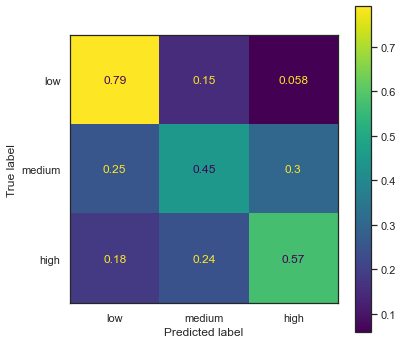

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score



def do_eval(test_predictions, y_test, modelname):
    dres = pd.DataFrame({
        "pred": test_predictions,
        "truth": y_test
    })
    d(dres)
    if len(set(y_test)) == 3:
        labels = ["low", "medium", "high"]
    
    if len(set(y_test)) == 2:
        labels = ["low", "high"]
        
    cm = confusion_matrix(
        dres["truth"].values, 
        dres["pred"].values,
        normalize='true'
    )
    print(cm)
    sns.set(rc={'figure.figsize':(6,6)})
    sns.set_style("white")

    cmp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=labels
    )
    cmp.plot()
    cmp.ax_.get_figure().savefig("cm_" + modelname + ".pdf", bbox_inches="tight")
    class_metrics = {
        "accuracy_score": accuracy_score(y_true=dres["truth"].values, y_pred=dres["pred"].values),
        "f1_score": f1_score(y_true=dres["truth"].values, y_pred=dres["pred"].values, average="weighted"),
        "precision_score": f1_score(y_true=dres["truth"].values, y_pred=dres["pred"].values, average="weighted"),
        "recall_score": f1_score(y_true=dres["truth"].values, y_pred=dres["pred"].values, average="weighted"),
        "cohen_kappa_score": cohen_kappa_score(dres["truth"].values, dres["pred"].values),
        "model": modelname

    }
    return class_metrics

class_metrics = []
class_metrics.append(
    do_eval(test_predictions, y_test, "rfc")
)

,pred,truth
0,0,2
1,0,1
2,0,0
3,1,1
4,2,2
...,...,...
255,0,0
256,1,2
257,0,1
258,2,2


[[0.6627907  0.20930233 0.12790698]
 [0.51724138 0.22988506 0.25287356]
 [0.35632184 0.20689655 0.43678161]]


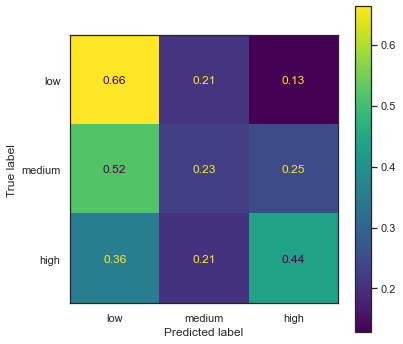

In [131]:
from sklearn import svm
svc = svm.SVC()

svc.fit(X_train, y_train)

test_predictions = svc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "svc")
)

,pred,truth
0,1,2
1,1,1
2,0,0
3,0,1
4,2,2
...,...,...
255,0,0
256,1,2
257,2,1
258,1,2


[[0.74418605 0.19767442 0.05813953]
 [0.31034483 0.42528736 0.26436782]
 [0.16091954 0.29885057 0.54022989]]


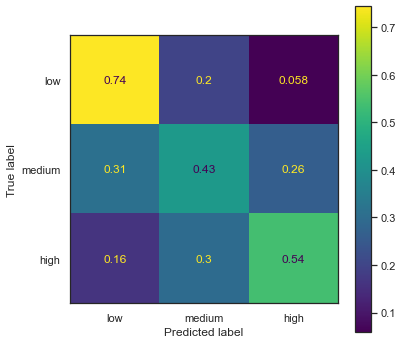

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=100,
)
gbc.fit(X_train, y_train)

test_predictions = gbc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "gbc")
)

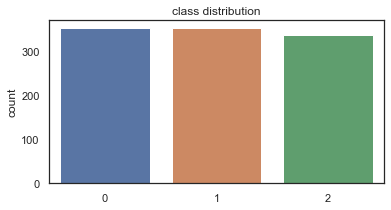

In [133]:
# plot class dist accodring to the "great" class thresholding approach

sns.set(rc={'figure.figsize':(6,3)})
sns.set_style("white")

ax = sns.countplot(x=ddnnf_class["class"].values)
ax.set_title("class distribution")
ax.get_figure().savefig("classdist.pdf", bbox_inches="tight")

In [85]:
print(class_metrics)

dclassmetrics = pd.DataFrame(class_metrics)

d(dclassmetrics)

print(
    dclassmetrics[["model", "accuracy_score", "f1_score", "precision_score", "recall_score"]].sort_values(by="accuracy_score", ascending=False).round(3).to_latex(index=False)
)

[{'accuracy_score': 0.6038461538461538, 'f1_score': 0.596595695970696, 'precision_score': 0.596595695970696, 'recall_score': 0.596595695970696, 'cohen_kappa_score': 0.4060240429401587, 'model': 'rfc'}, {'accuracy_score': 0.4423076923076923, 'f1_score': 0.4267341880352244, 'precision_score': 0.4267341880352244, 'recall_score': 0.4267341880352244, 'cohen_kappa_score': 0.16432070578325542, 'model': 'svc'}, {'accuracy_score': 0.5538461538461539, 'f1_score': 0.5501735053533038, 'precision_score': 0.5501735053533038, 'recall_score': 0.5501735053533038, 'cohen_kappa_score': 0.3309374861351436, 'model': 'gbc'}]


,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,model
0,0.603846,0.596596,0.596596,0.596596,0.406024,rfc
1,0.442308,0.426734,0.426734,0.426734,0.164321,svc
2,0.553846,0.550174,0.550174,0.550174,0.330937,gbc


\begin{tabular}{lrrrr}
\toprule
model &  accuracy\_score &  f1\_score &  precision\_score &  recall\_score \\
\midrule
  rfc &           0.604 &     0.597 &            0.597 &         0.597 \\
  gbc &           0.554 &     0.550 &            0.550 &         0.550 \\
  svc &           0.442 &     0.427 &            0.427 &         0.427 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_532583/2495297574.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dclassmetrics[["model", "accuracy_score", "f1_score", "precision_score", "recall_score"]].sort_values(by="accuracy_score", ascending=False).round(3).to_latex(index=False)


,blur,blur_stength,color_fulness,contrast,count_1,count_2,count_3,count_4,count_5,cpbd,...,saturation,si,simplicity,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency,class
0,26406.702098,0.327312,138.659979,84.181416,2,1,8,7,5,0.884722,...,45.451583,0.232381,2.163852e-05,16945.347024,3.252017,0.759826,6,0.018195,0.133656,1
1,67384.029520,0.268583,104.675082,83.552939,4,7,7,5,4,0.975000,...,43.201122,0.382488,9.852608e-07,16790.058447,0.968191,0.577008,2,0.160672,0.367228,0
2,48336.483041,0.417756,52.028023,80.851269,2,2,10,11,5,0.836491,...,11.047839,0.255594,9.999940e-01,21863.079921,1.287890,0.788853,8,0.030221,0.171194,1
3,48337.186393,0.439059,128.999337,88.055617,0,6,9,6,2,0.619565,...,15.047624,0.314595,9.974234e-01,19387.248858,1.091901,0.610565,2,0.039222,0.194122,1
4,58812.675989,0.223902,153.932848,84.466508,0,3,4,8,10,0.988669,...,35.516140,0.396389,2.065818e-05,12562.584776,0.794549,0.702838,5,0.065129,0.246754,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,137118.276066,0.299908,141.939105,90.390416,6,7,12,5,3,0.966261,...,7.646802,0.386891,9.142610e-01,21645.689315,3.795820,0.641046,7,0.027771,0.164317,0
1034,142481.662501,0.277882,137.463009,86.373567,1,4,12,6,0,0.986333,...,39.050476,0.407439,9.633499e-01,17954.100246,0.893128,0.762570,17,0.014751,0.120553,0
1035,423006.937656,0.238177,153.328991,89.459027,0,4,7,7,7,0.994017,...,9.260073,0.599511,2.755574e-08,19269.845387,3.291512,0.499647,67,0.032618,0.177633,1
1036,1017.217432,0.461570,61.733606,94.065372,8,6,10,5,1,0.125000,...,88.385312,0.073388,9.997045e-01,19121.098945,1.339804,0.432870,2,0.009183,0.095386,0


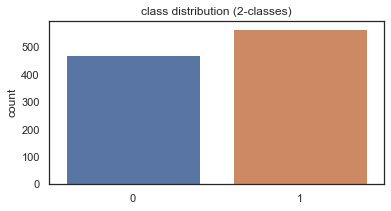

In [134]:
# use only two classes based on mean scores

# define two classes

count_cols = [x for x in dfeatures.columns if "count_" in x]

df_tmp = dfeatures[dfeatures.columns.difference(["mos", "image", "dominant_color", "num_ratings", "ci", "std"] 
)].copy()

ddnnf_class_two = pd.merge(df_tmp, ddn_mos, left_on="filename", right_on="filename")

ddnnf_class_two = ddnnf_class_two[ddnnf_class_two.columns.difference(["mos"])]


def get_class(x):
    mos = (x * np.array([1,2,3,4,5])).sum() / x.sum()
    if mos <=3.0:
        return 0
    return 1

ddnnf_class_two["class"] = ddnnf_class_two[count_cols].apply(get_class, axis=1)


d(ddnnf_class_two)

sns.set(rc={'figure.figsize':(6,3)})
sns.set_style("white")

ax = sns.countplot(x=ddnnf_class_two["class"].values)
ax.set_title("class distribution (2-classes)")
ax.get_figure().savefig("classdist_two.pdf", bbox_inches="tight")



In [135]:

feature_columns = list(ddnnf_class_two.columns.difference(["filename", "mos", "img_path", "class"] + count_cols))

X = ddnnf_class_two[feature_columns].values
y = ddnnf_class_two["class"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)



,pred,truth
0,0,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
255,0,0
256,1,1
257,1,1
258,1,1


[[0.76724138 0.23275862]
 [0.25       0.75      ]]


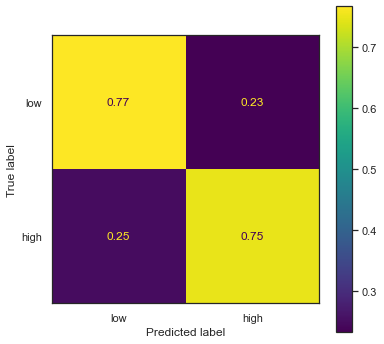

In [136]:
rfc = RandomForestClassifier(
    n_estimators=100, 
    n_jobs=-1, 
    random_state=42
)
rfc.fit(X_train, y_train)
test_predictions = rfc.predict(X_test)


class_metrics = []
class_metrics.append(
    do_eval(test_predictions, y_test, "rfc_two")
)

,pred,truth
0,0,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
255,1,0
256,0,1
257,1,1
258,1,1


[[0.35344828 0.64655172]
 [0.25694444 0.74305556]]


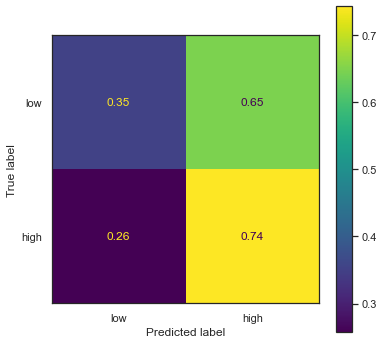

In [137]:
from sklearn import svm
svc = svm.SVC()

svc.fit(X_train, y_train)

test_predictions = svc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "svc_two")
)

,pred,truth
0,0,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
255,0,0
256,0,1
257,1,1
258,0,1


[[0.80172414 0.19827586]
 [0.19444444 0.80555556]]


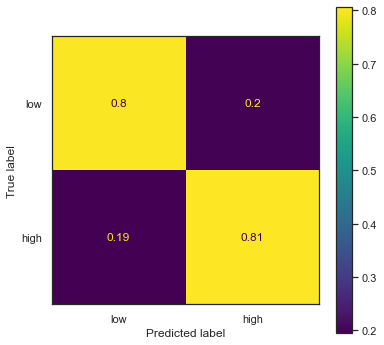

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=100,
)
gbc.fit(X_train, y_train)

test_predictions = gbc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "gbc_two")
)

In [139]:
print(class_metrics)

dclassmetrics = pd.DataFrame(class_metrics)

d(dclassmetrics)

print(
    dclassmetrics[["model", "accuracy_score", "f1_score", "precision_score", "recall_score"]].sort_values(by="accuracy_score", ascending=False).round(3).to_latex(index=False)
)

[{'accuracy_score': 0.7576923076923077, 'f1_score': 0.7583085365979223, 'precision_score': 0.7583085365979223, 'recall_score': 0.7583085365979223, 'cohen_kappa_score': 0.5133689839572192, 'model': 'rfc_two'}, {'accuracy_score': 0.5692307692307692, 'f1_score': 0.5521482122962106, 'precision_score': 0.5521482122962106, 'recall_score': 0.5521482122962106, 'cohen_kappa_score': 0.09967845659163987, 'model': 'svc_two'}, {'accuracy_score': 0.8038461538461539, 'f1_score': 0.8041824794161871, 'precision_score': 0.8041824794161871, 'recall_score': 0.8041824794161871, 'cohen_kappa_score': 0.6047454393704543, 'model': 'gbc_two'}]


,accuracy_score,f1_score,precision_score,recall_score,cohen_kappa_score,model
0,0.757692,0.758309,0.758309,0.758309,0.513369,rfc_two
1,0.569231,0.552148,0.552148,0.552148,0.099678,svc_two
2,0.803846,0.804182,0.804182,0.804182,0.604745,gbc_two


\begin{tabular}{lrrrr}
\toprule
  model &  accuracy\_score &  f1\_score &  precision\_score &  recall\_score \\
\midrule
gbc\_two &           0.804 &     0.804 &            0.804 &         0.804 \\
rfc\_two &           0.758 &     0.758 &            0.758 &         0.758 \\
svc\_two &           0.569 &     0.552 &            0.552 &         0.552 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_532583/2495297574.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dclassmetrics[["model", "accuracy_score", "f1_score", "precision_score", "recall_score"]].sort_values(by="accuracy_score", ascending=False).round(3).to_latex(index=False)
